# Different backends

In [1]:
from discopy import Ty, Word

s, n = Ty('s'), Ty('n')
Alice, loves, Bob = Word('Alice', n), Word('loves', n.r @ s @ n.l), Word('Bob', n)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [Alice, loves, Bob]))))

Vocabulary:
Word('Alice', Ty('n'))
Word('loves', Ty(Ob('n', z=1), 's', Ob('n', z=-1)))
Word('Bob', Ty('n'))


Diagram for 'Alice loves Bob':


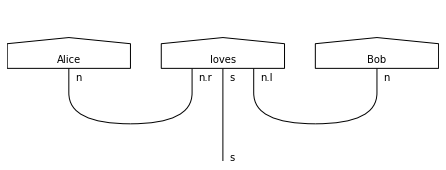

In [2]:
from discopy import Diagram, Id, Cup
from discopy.grammar import draw

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
parsing = {"{} {} {}.".format(subj, verb, obj): subj @ verb @ obj >> grammar
            for subj in [Alice, Bob] for verb in [loves] for obj in [Alice, Bob]}

diagram = parsing['Alice loves Bob.']
print("Diagram for 'Alice loves Bob':")
draw(diagram, draw_type_labels=True)

In [3]:
from discopy.quantum import Ket, H, Rx, CX, sqrt

def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

print(verb_ansatz(0).eval())

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])


Circuit for 'Alice loves Bob':


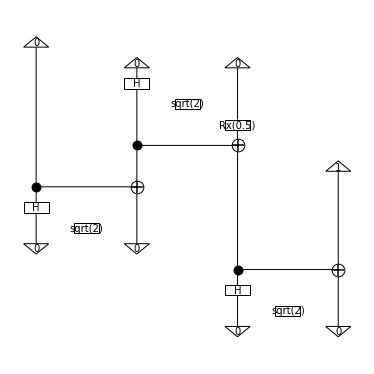

In [4]:

from discopy import CircuitFunctor, qubit

ob = {s: 0, n: 1}
ar = lambda params: {
    Alice: Ket(0), Bob: Ket(1),
    loves: verb_ansatz(params['loves'])}

F = lambda params: CircuitFunctor(ob, ar(params))

params0 = {'loves': 0.5}

print("Circuit for 'Alice loves Bob':")
F(params0)(parsing['Alice loves Bob.']).draw(
    aspect='auto', draw_type_labels=False, figsize=(5, 5))

In [42]:
from discopy import Tensor
import tensorflow as tf
print("Amplitude for 'Alice loves Bob':")
params0 = {'loves': tf.Variable([0.420])}
with Tensor.backend('tensorflow') as backend:
    a = F(params0)(parsing['Alice loves Bob.']).eval()
a.array

Amplitude for 'Alice loves Bob':


<tf.Tensor: shape=(), dtype=complex128, numpy=-0.9685831665992738j>